<a href="https://colab.research.google.com/github/Ferpm7/Regresi-n-Lineal-Simple/blob/main/Actividad_4_(Regresi%C3%B3n_Lineal_Simple).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fernando Pérez Martínez - A01769688

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("DF_Mexico.csv")
df

In [ ]:
df.info()

In [ ]:
num = df['calendar_updated'].value_counts()
num

In [149]:
#Se Limpian las columnas
columns_to_drop = ['calendar_updated', 'license', 'bathrooms', 'neighbourhood_group_cleansed', 'id','host_id','host_name', 'listing_url','host_about','picture_url','host_picture_url','neighborhood_overview', 'description','host_about','scrape_id','name','host_thumbnail_url','amenities']
df = df.drop(columns=columns_to_drop)

In [150]:
#Conversión de tipo para mejor manejo
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '').astype(float)

In [8]:
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '').astype(float)

In [9]:
df['price'] = df['price'].str.replace(',', '')

In [ ]:
df['price'] = df['price'].str.replace('$', '').astype(float)

In [ ]:
#Valores atipicos llenados
columnas = ['host_acceptance_rate', 'host_response_rate']
df[columnas] = df[columnas].fillna(0)
df.fillna(df.mean())

In [12]:
df.fillna(method='bfill', inplace=True)

In [13]:
df.fillna(method='ffill', inplace=True)

In [ ]:
df.info()

In [15]:
#Utilización de las variables
room = df[["room_type",'property_type']]

In [ ]:
#Método desviación estandar para eliminar los outliers6
y = df
limite_superior = y.mean() + 3*y.std()
limite_inferior = y.mean() - 3*y.std()
print("Límite superior permitido" , limite_superior)
print("\nLímite inferior permitido" , limite_inferior)

In [ ]:
#Conversion atipico-nulo
df2 = df[(y <= limite_superior) & (y >=limite_inferior)]
df2

In [ ]:
df2.info()

In [19]:
df2.dropna(axis=1, how='all', inplace=True)

In [ ]:
df2.info()

In [ ]:
#Utilización de las variables
conservacion = ["host_acceptance_rate", "host_response_rate", "price", "number_of_reviews", "review_scores_location", "review_scores_cleanliness", "availability_365", "reviews_per_month", "review_scores_communication"]
df3 = df2[conservacion]
df3

In [ ]:
df4 = pd.concat([room, df3], axis=1)
df4.info()

In [23]:
df4.fillna(method='ffill',inplace=True)
df4.fillna(method='bfill',inplace=True)

In [ ]:
df4.info()

In [ ]:
dfsr = df4[df4['room_type'] == 'Shared room']
dfsr

In [ ]:
from turtle import color
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=dfsr)

In [ ]:
from sklearn.linear_model import LinearRegression

Vars_Indep= dfsr[['host_response_rate']]
Var_Dep= dfsr['host_acceptance_rate']

modelPR = LinearRegression()

modelPR.fit(X=Vars_Indep,y=Var_Dep)


modelPR.__dict__

In [ ]:
y_pred= modelPR.predict(X=dfsr[['host_response_rate']])
y_pred

In [29]:
dfsr1 = dfsr.copy()

In [ ]:
dfsr1.insert(0, 'Predicciones', y_pred)
dfsr1

In [ ]:
sns.scatterplot(x='host_response_rate',
                y='host_acceptance_rate',
                color="blue",
                data=dfsr1)
sns.scatterplot(x='host_response_rate',
                y='Predicciones',
                color="red",
                data=dfsr1)
sns.lineplot(x='host_response_rate',
             y='Predicciones',
             color="red",
             data=dfsr1)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
cd01=modelPR.score(X=Vars_Indep, y=Var_Dep)
cd01

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
cc01=np.sqrt(cd01)
cc01

In [ ]:
from turtle import color
sns.scatterplot(x='price', y='host_response_rate', color="green", data=dfsr)

In [ ]:
from sklearn.linear_model import LinearRegression

Vars_Indep= dfsr[['price']]
Var_Dep= dfsr['host_acceptance_rate']


model = LinearRegression()

model.fit(X=Vars_Indep,y=Var_Dep)


model.__dict__

In [ ]:
y_pred= model.predict(X=dfsr[['price']])
y_pred

In [37]:
dfsr2 = dfsr.copy()

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
dfsr2.insert(0, 'Predicciones', y_pred)
dfsr2

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='price',
                y='host_acceptance_rate',
                color="blue",
                data=dfsr2)
sns.scatterplot(x='price',
                y='Predicciones',
                color="red",
                data=dfsr2)
sns.lineplot(x='price',
             y='Predicciones',
             color="red",
             data=dfsr2)

In [40]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
cd02=model.score(X=Vars_Indep, y=Var_Dep)
cd02

0.09681294340769875

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
cc02=np.sqrt(cd02)
cc02

In [ ]:
from turtle import color
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="pink", data=dfsr)

In [ ]:
from sklearn.linear_model import LinearRegression

Vars_Indep= dfsr[['number_of_reviews']]
Var_Dep= dfsr['host_acceptance_rate']

modelPR = LinearRegression()

modelPR.fit(X=Vars_Indep,y=Var_Dep)


modelPR.__dict__

In [ ]:
y_pred= modelPR.predict(X=dfsr[['number_of_reviews']])
y_pred

In [45]:
dfsr3 = dfsr.copy()

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
dfsr3.insert(0, 'Predicciones', y_pred)
dfsr3

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='number_of_reviews',
                y='host_acceptance_rate',
                color="blue",
                data=dfsr3)
sns.scatterplot(x='number_of_reviews',
                y='Predicciones',
                color="red",
                data=dfsr3)
sns.lineplot(x='number_of_reviews',
             y='Predicciones',
             color="red",
             data=dfsr3)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
cd03=modelPR.score(X=Vars_Indep, y=Var_Dep)
cd03

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
cc03=np.sqrt(cd03)
cc03

In [ ]:
from turtle import color
sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color="red", data=dfsr)

In [ ]:
from sklearn.linear_model import LinearRegression

Vars_Indep= dfsr[['review_scores_cleanliness']]
Var_Dep= dfsr['review_scores_location']

modelPR = LinearRegression()

modelPR.fit(X=Vars_Indep,y=Var_Dep)


modelPR.__dict__

In [ ]:
y_pred= modelPR.predict(X=dfsr[['review_scores_cleanliness']])
y_pred

In [53]:
dfsr4 = dfsr.copy()

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
dfsr4.insert(0, 'Predicciones', y_pred)
dfsr4

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='review_scores_cleanliness',
                y='review_scores_location',
                color="blue",
                data=dfsr4)
sns.scatterplot(x='review_scores_cleanliness',
                y='Predicciones',
                color="red",
                data=dfsr4)
sns.lineplot(x='review_scores_cleanliness',
             y='Predicciones',
             color="red",
             data=dfsr4)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
cd04=modelPR.score(X=Vars_Indep, y=Var_Dep)
cd04

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
cc04=np.sqrt(cd04)
cc04

In [ ]:
from turtle import color
sns.scatterplot(x='number_of_reviews', y='availability_365', color="cyan", data=dfsr)

In [ ]:
from sklearn.linear_model import LinearRegression

Vars_Indep= dfsr[['number_of_reviews']]
Var_Dep= dfsr['availability_365']

modelPR = LinearRegression()

modelPR.fit(X=Vars_Indep,y=Var_Dep)

modelPR.__dict__

In [ ]:
y_pred= modelPR.predict(X=dfsr[['number_of_reviews']])
y_pred

In [61]:
dfsr5 = dfsr.copy()

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
dfsr5.insert(0, 'Predicciones', y_pred)
dfsr5

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='number_of_reviews',
                y='availability_365',
                color="blue",
                data=dfsr5)
sns.scatterplot(x='number_of_reviews',
                y='Predicciones',
                color="red",
                data=dfsr5)
sns.lineplot(x='number_of_reviews',
             y='Predicciones',
             color="red",
             data=dfsr5)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
cd05=modelPR.score(X=Vars_Indep, y=Var_Dep)
cd05



In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
cc05=np.sqrt(cd05)
cc05

In [ ]:
from turtle import color
sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color="brown", data=dfsr)

In [ ]:
from sklearn.linear_model import LinearRegression

Vars_Indep= dfsr[['review_scores_communication']]
Var_Dep= dfsr['reviews_per_month']

modelPR = LinearRegression()

modelPR.fit(X=Vars_Indep,y=Var_Dep)

modelPR.__dict__

In [ ]:
y_pred= modelPR.predict(X=dfsr[['review_scores_communication']])
y_pred

In [71]:
dfsr6 = dfsr.copy()

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
dfsr6.insert(0, 'Predicciones', y_pred)
dfsr6

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='review_scores_communication',
                y='reviews_per_month',
                color="blue",
                data=dfsr6)
sns.scatterplot(x='review_scores_communication',
                y='Predicciones',
                color="red",
                data=dfsr6)
sns.lineplot(x='review_scores_communication',
             y='Predicciones',
             color="red",
             data=dfsr6)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
cd06=modelPR.score(X=Vars_Indep, y=Var_Dep)
cd06

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
cc06=np.sqrt(cd06)
cc06

#PRIVATE ROOM

In [ ]:
dfpr = df4[df4['room_type'] == 'Private room']
dfpr

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

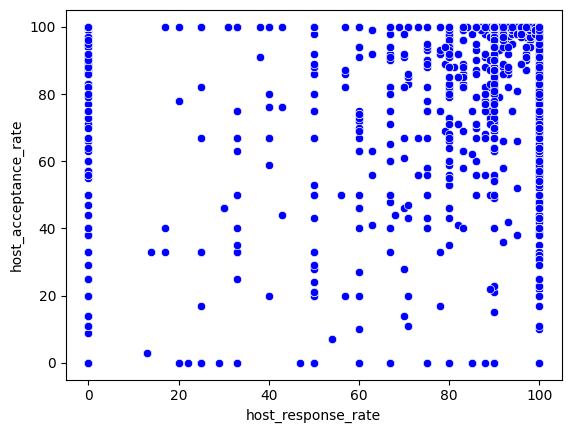

In [77]:
from turtle import color
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=dfpr)

In [ ]:
Vars_Indep= dfpr[['host_response_rate']]
Var_Dep= dfpr['host_acceptance_rate']

from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

model.__dict__

In [ ]:
y_pred= model.predict(X=dfpr[['host_response_rate']])
y_pred

In [80]:
dfpr1 = dfpr.copy()

In [ ]:
dfpr1.insert(0, 'Predicciones', y_pred)
dfpr1

In [ ]:
sns.scatterplot(x='host_response_rate',
                y='host_acceptance_rate',
                color="blue",
                data=dfpr1)
sns.scatterplot(x='host_response_rate',
                y='Predicciones',
                color="red",
                data=dfpr1)
sns.lineplot(x='host_response_rate',
             y='Predicciones',
             color="red",
             data=dfpr1)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
cd07=model.score(X=Vars_Indep, y=Var_Dep)
cd07

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
cc07=np.sqrt(cd07)
cc07

In [ ]:
from turtle import color
sns.scatterplot(x='price', y='host_response_rate', color="green", data=dfpr)

In [ ]:
Vars_Indep= dfpr[['price']]
Var_Dep= dfpr['host_acceptance_rate']

from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

model.__dict__

In [ ]:
y_pred= model.predict(X=dfpr[['price']])
y_pred

In [88]:
dfpr2 = dfpr.copy()

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
dfpr2.insert(0, 'Predicciones', y_pred)
dfpr2

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='price',
                y='host_acceptance_rate',
                color="blue",
                data=dfpr2)
sns.scatterplot(x='price',
                y='Predicciones',
                color="red",
                data=dfpr2)
sns.lineplot(x='price',
             y='Predicciones',
             color="red",
             data=dfpr2)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
cd08=model.score(X=Vars_Indep, y=Var_Dep)
cd08

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
cc08=np.sqrt(cd08)
cc08

In [ ]:
from turtle import color
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="pink", data=dfpr)

In [ ]:
Vars_Indep= dfpr[['number_of_reviews']]
Var_Dep= dfpr['host_acceptance_rate']

from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

model.__dict__

In [ ]:
y_pred= model.predict(X=dfpr[['number_of_reviews']])
y_pred

In [96]:
dfpr3 = dfpr.copy()

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
dfpr3.insert(0, 'Predicciones', y_pred)
dfpr3

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='number_of_reviews',
                y='host_acceptance_rate',
                color="blue",
                data=dfpr3)
sns.scatterplot(x='number_of_reviews',
                y='Predicciones',
                color="red",
                data=dfpr3)
sns.lineplot(x='number_of_reviews',
             y='Predicciones',
             color="red",
             data=dfpr3)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
cd09=model.score(X=Vars_Indep, y=Var_Dep)
cd09

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
cc09=np.sqrt(cd09)
cc09

In [ ]:
from turtle import color
sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color="red", data=dfpr)

In [ ]:
Vars_Indep= dfpr[['review_scores_cleanliness']]
Var_Dep= dfpr['review_scores_location']

from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

model.__dict__

In [ ]:
y_pred= model.predict(X=dfpr[['review_scores_cleanliness']])
y_pred

In [104]:
dfpr4 = dfpr.copy()

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
dfpr4.insert(0, 'Predicciones', y_pred)
dfpr4

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='review_scores_cleanliness',
                y='review_scores_location',
                color="blue",
                data=dfpr4)
sns.scatterplot(x='review_scores_cleanliness',
                y='Predicciones',
                color="red",
                data=dfpr4)
sns.lineplot(x='review_scores_cleanliness',
             y='Predicciones',
             color="red",
             data=dfpr4)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
cd10=model.score(X=Vars_Indep, y=Var_Dep)
cd10

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
cc10=np.sqrt(cd10)
cc10

In [ ]:
from turtle import color
sns.scatterplot(x='number_of_reviews', y='availability_365', color="cyan", data=dfpr)

In [ ]:
Vars_Indep= dfpr[['number_of_reviews']]
Var_Dep= dfpr['availability_365']

from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

model.__dict__

In [ ]:
y_pred= model.predict(X=dfpr[['number_of_reviews']])
y_pred

In [112]:
dfpr5 = dfpr.copy()

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
dfpr5.insert(0, 'Predicciones', y_pred)
dfpr5

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='number_of_reviews',
                y='availability_365',
                color="blue",
                data=dfpr5)
sns.scatterplot(x='number_of_reviews',
                y='Predicciones',
                color="red",
                data=dfpr5)
sns.lineplot(x='number_of_reviews',
             y='Predicciones',
             color="red",
             data=dfpr5)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
cd11=model.score(X=Vars_Indep, y=Var_Dep)
cd11

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
cc11=np.sqrt(cd11)
cc11

In [ ]:
from turtle import color
sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color="brown", data=dfpr)

In [118]:
Vars_Indep= dfpr[['review_scores_communication']]
Var_Dep= dfpr['reviews_per_month']

from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.24830514]),
 'rank_': 1,
 'singular_': array([20.90109595]),
 'intercept_': 2.4680990982285946}

In [ ]:
y_pred= model.predict(X=dfpr[['review_scores_communication']])
y_pred

In [120]:
dfpr6 = dfpr.copy()

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
dfpr6.insert(0, 'Predicciones', y_pred)
dfpr6

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='review_scores_communication',
                y='reviews_per_month',
                color="blue",
                data=dfpr6)
sns.scatterplot(x='review_scores_communication',
                y='Predicciones',
                color="red",
                data=dfpr6)
sns.lineplot(x='review_scores_communication',
             y='Predicciones',
             color="red",
             data=dfpr6)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
cd12=model.score(X=Vars_Indep, y=Var_Dep)
cd12

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
cc12=np.sqrt(cd12)
cc12

EMPTY

In [ ]:
#Encontramos todas las correlaciones entre las variables
Corr_FactorsSR = dfsr.corr()
Corr_Factors1SR = Corr_FactorsSR.round(2)
Corr_Factors1SR

In [ ]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables
Corr_Factors2SR = abs(Corr_Factors1SR)
Corr_Factors2SR

In [ ]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(20, 18))  # Puedes ajustar el tamaño (ancho, alto) según tus preferencias

# Crear el mapa de calor
Heat_MapSR = sns.heatmap(Corr_Factors2SR, cmap='YlGnBu', annot=True, fmt=".2f")

# Mostrar la gráfica
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

Vars_Indep= dfsr[['host_acceptance_rate']]
Var_Dep= dfsr['number_of_reviews']

modelPR = LinearRegression()

modelPR.fit(X=Vars_Indep, y=Var_Dep)

modelPR.__dict__

In [ ]:
y_pred= modelPR.predict(X=dfsr[['host_acceptance_rate']])
y_pred

In [ ]:
dfsr.insert(0, 'Predicciones', y_pred)
dfsr

In [ ]:
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="red", data=dfsr)

In [ ]:
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=dfsr)
sns.scatterplot(x='number_of_reviews', y='Predicciones', color="red", data=dfsr)
sns.lineplot(x='number_of_reviews', y='Predicciones', color="red", data=dfsr)

In [ ]:
#Encontramos todas las correlaciones entre las variables
Corr_FactorsPR = dfpr.corr()
Corr_Factors1PR = Corr_FactorsPR.round(2)
Corr_Factors1PR

In [ ]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables
Corr_Factors2PR = abs(Corr_Factors1PR)
Corr_Factors2PR

In [ ]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(20, 18))  # Puedes ajustar el tamaño (ancho, alto) según tus preferencias

# Crear el mapa de calor
Heat_MapPR = sns.heatmap(Corr_Factors2PR, cmap='YlGnBu', annot=True, fmt=".2f")

# Mostrar la gráfica
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

Vars_Indep= dfsr[['reviews_per_month']]
Var_Dep= dfsr['number_of_reviews']

modelPR = LinearRegression()

modelPR.fit(X=Vars_Indep, y=Var_Dep)

modelPR.__dict__

In [ ]:
y_pred= modelPR.predict(X=dfpr[['reviews_per_month']])
y_pred

In [ ]:
dfpr.insert(0, 'Predicciones', y_pred)
dfpr

In [ ]:
sns.scatterplot(x='number_of_reviews', y='reviews_per_month', color="red", data=dfpr)

In [ ]:
sns.scatterplot(x='number_of_reviews', y='reviews_per_month', color="blue", data=dfpr)
sns.scatterplot(x='number_of_reviews', y='Predicciones', color="red", data=dfpr)
sns.lineplot(x='number_of_reviews', y='Predicciones', color="red", data=dfpr)

In [ ]:
datos = {
    'coef y corr shared room': ['coef_Deter', 'coef_corr', 'coef_Deter2','coef_corr2', 'coef_Deter3', 'coef_corr3', 'coef_Deter4', 'coef_corr4', 'coef_Deter5', 'coef_corr5', 'coef_Deter6', 'coef_corr6'],
    'coeficiente': [cd01, cc01, cd02, cc02,cd03, cc03, cd04, cc04, cd05, cc05, cd06, cc06]
}
dff = pd.DataFrame(datos)
dff

In [ ]:
datos = {
    'coef y corr private room': ['coef_Deter', 'coef_corr', 'coef_Deter2','coef_corr2', 'coef_Deter3', 'coef_corr3', 'coef_Deter4', 'coef_corr4', 'coef_Deter5', 'coef_corr5', 'coef_Deter6', 'coef_corr6'],
    'coeficiente': [cd07, cc07, cd08, cc08,cd09, cc09, cd10, cc10, cd11, cc11, cd12, cc12]
}
dff = pd.DataFrame(datos)
dff

In [151]:
%%shell
jupyter nbconvert --to html /content/Untitled3.ipynb

[NbConvertApp] Converting notebook /content/Untitled3.ipynb to html
[NbConvertApp] Writing 786573 bytes to /content/Untitled3.html
